In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='stopwords-bn.txt'

In [ ]:
train_df = pd.read_excel('/content/d_test_balanced.xlsx')
val_df = pd.read_excel('/content/d_test_balanced.xlsx')

In [ ]:
data = pd.concat([train_df, val_df])

In [ ]:
data = pd.read_excel('/content/combined_dataset.xlsx')
data.head()

,comment,comment_type
0,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",sadness
1,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,sadness
2,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,angry
3,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,joy
4,রাতের বেলা আবার কিসের সকাল।,angry


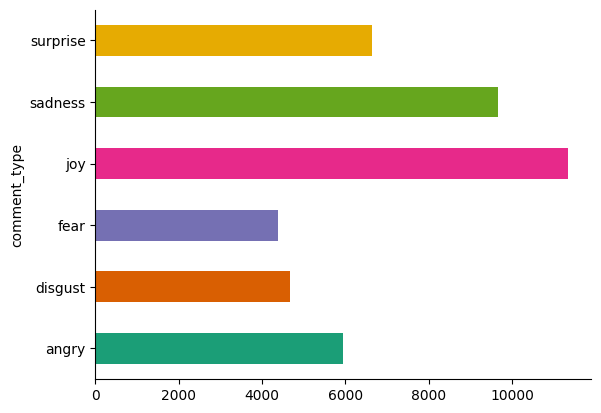

In [ ]:
# @title comment_type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('comment_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.comment_type =='happy']),
      "\nTotal Negative Reviews:",len(data[data.comment_type=='angry']),
      "\nTotal Very Positive Reviews:",len(data[data.comment_type =='sad']),
      "\nTotal Very Negative Reviews:",len(data[data.comment_type =='disgust']),
      "\nTotal Very Positive Reviews:",len(data[data.comment_type =='surprise']),
      "\nTotal Very Negative Reviews:",len(data[data.comment_type =='fear']))

Total Reviews: 42604 
Total Positive Reviews: 0 
Total Negative Reviews: 5936 
Total Very Positive Reviews: 0 
Total Very Negative Reviews: 4665 
Total Very Positive Reviews: 6634 
Total Very Negative Reviews: 4379


In [ ]:
value_counts = data['Comment_Type'].value_counts()
mylabels = ["Positive", "Negative", "Very Positive", "Very Negative"]
value_counts.plot.pie(autopct='%1.1f%%', labels=value_counts.index, )
plt.show()

KeyError: 'Comment_Type'

In [ ]:
data.columns

Index(['comment', 'comment_type'], dtype='object')

In [ ]:
sample_data = [10,24,102,150,200,250,550,750,950]
for i in sample_data:
      print(data.comment[i],'\n','Comment_Type:-- ',data.comment_type[i],'\n')

কেয়ামতের মাঠে তোমাদের ছাড়া নট। 
 Comment_Type:--  fear 

সম্রাট আকবর নাস্তিক তাই এই আনুস্থান আমাদের জন্য হারাম 
 Comment_Type:--  fear 

হা হা হা! আগে গোপনে ভোট চুরি হতো। আর এখন প্রকাশ্যে ভোট চুরি হয়। যে দেশে বাক স্বাধীনতা নেই, গণতন্ত্র নেই, সেদেশে সহিংসতা হওয়াটা মোটেও অস্বাভাবিক নয়। তাদের গণতন্ত্রের সংজ্ঞার ভেতর 'জনগণ' এর স্থানে আছে 'দলীয় নেতাকর্মী'। তারা জনগণের থেকে টাকা মেরে দলীয় নেতাকর্মীদের তরতাজা করে। এটাই হলো তাদের গণতন্ত্র... 
 Comment_Type:--  fear 

টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে ! 
 Comment_Type:--  angry 

নাস্তিকদের দালাল একাওর টিভি বন্ধ করা হোক,https://www.facebook.com/events/510113745860941 
 Comment_Type:--  angry 

প্রতিটি দেশের সেনা-বাহিনী তাদের দেশের গৌরব, অহংকার । তেমনি আমার দেশের সেনা বাহিনীও আমাদের গৌরব, অহংকার, এবং জাতীয় মর্যাদার প্রতিক । কুমিল্লা ভিক্টোরিয়া কলেজ ও বিশ্ববিদ্যালয় এর ইতিহাস বিভাগের ছাত্রী হত্যায়, স্থানটি সত্যি ..!!! এটা আমাদের জাতীয় মর্যাদা ও অহংকারে আঘাত স্বরূপ । এই দৃষ্টতা যে/যারা দেখিয়েছে ওদের, আকাশ ফেরে, মাটি খুড়ে বের করতে হবে । একে এক

In [ ]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

In [ ]:
data['cleaned'] = data['comment'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = False)

In [ ]:
data.head()

,comment,comment_type,cleaned
0,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",sadness,বরাবর মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...
1,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,sadness,তদন্ত করে লাভ কী কোন দিন কোন তদন্তের পর কিছু...
2,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের...
3,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধ...,joy,আমি গর্বিত আমি মুসলিম আমি সংগ্রামী আমি যোদ্ধ...
4,রাতের বেলা আবার কিসের সকাল।,angry,রাতের বেলা আবার কিসের সকাল


In [ ]:
sample_data = [10,24,102,150,200,250,550,750,950]
for i in sample_data:
      print('Original:\n',data.comment[i],'\nCleaned:\n',data.cleaned[i],'\n','comment_Type:-- ',data.comment_type[i],'\n')

Original:
 কেয়ামতের মাঠে তোমাদের ছাড়া নট। 
Cleaned:
 কেয়ামতের মাঠে তোমাদের ছাড়া নট  
 comment_Type:--  fear 

Original:
 সম্রাট আকবর নাস্তিক তাই এই আনুস্থান আমাদের জন্য হারাম 
Cleaned:
 সম্রাট আকবর নাস্তিক তাই এই আনুস্থান আমাদের জন্য হারাম 
 comment_Type:--  fear 

Original:
 হা হা হা! আগে গোপনে ভোট চুরি হতো। আর এখন প্রকাশ্যে ভোট চুরি হয়। যে দেশে বাক স্বাধীনতা নেই, গণতন্ত্র নেই, সেদেশে সহিংসতা হওয়াটা মোটেও অস্বাভাবিক নয়। তাদের গণতন্ত্রের সংজ্ঞার ভেতর 'জনগণ' এর স্থানে আছে 'দলীয় নেতাকর্মী'। তারা জনগণের থেকে টাকা মেরে দলীয় নেতাকর্মীদের তরতাজা করে। এটাই হলো তাদের গণতন্ত্র... 
Cleaned:
 হা হা হা  আগে গোপনে ভোট চুরি হতো  আর এখন প্রকাশ্যে ভোট চুরি হয়  যে দেশে বাক স্বাধীনতা নেই  গণতন্ত্র নেই  সেদেশে সহিংসতা হওয়াটা মোটেও অস্বাভাবিক নয়  তাদের গণতন্ত্রের সংজ্ঞার ভেতর  জনগণ  এর স্থানে আছে  দলীয় নেতাকর্মী   তারা জনগণের থেকে টাকা মেরে দলীয় নেতাকর্মীদের তরতাজা করে  এটাই হলো তাদের গণতন্ত্র    
 comment_Type:--  fear 

Original:
 টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে ! 
Cleaned:
 টাকা পাইলে সব খানকীর

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset),
      "\nTotal Positive Reviews:",len(dataset[dataset.comment_type =='Positive']),
      "\nTotal Negative Reviews:",len(dataset[dataset.comment_type=='Negative']),
      "\nTotal Very Positive Reviews:",len(dataset[dataset.comment_type =='Very Positive']),
      "\nTotal Very Negative Reviews:",len(dataset[dataset.comment_type =='Very Negative']))

After Cleaning: 
Removed 761 Small Reviews 
Total Reviews: 41843 
Total Positive Reviews: 0 
Total Negative Reviews: 0 
Total Very Positive Reviews: 0 
Total Very Negative Reviews: 0


In [ ]:
value_counts = dataset['Comment_Type'].value_counts()
mylabels = ["Positive", "Negative", "Very Positive", "Very Negative"]
value_counts.plot.pie(autopct='%1.1f%%', labels=value_counts.index, )
plt.show()

KeyError: 'Comment_Type'

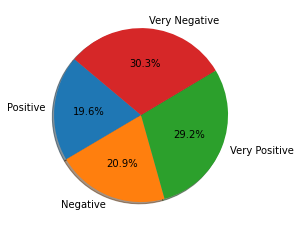

In [ ]:
import matplotlib.pyplot as plt
# Plot data
languages = 'Positive', 'Negative', 'Very Positive', 'Very Negative'
popuratity = [141, 150, 210, 218]
#colors = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
# explode 1st slice
explode = (0, 0, 0, 0)
# Plot
plt.pie(popuratity, explode=explode, labels=languages, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
#plt.title("", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
dataset[['cleaned','comment_type']].to_excel('clean_reviews.xlsx')

In [ ]:
# open a file, where you want to store the data
file = open('clean_reviews.pkl', 'wb')
# dump information to that file
pickle.dump(data, file)

In [ ]:
# load the save file
data = open('clean_reviews.pkl','rb')
data = pickle.load(data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x95 in position 4: invalid start byte

In [ ]:
# Stopwords pickle
stp = open(stopwords_list,'r', encoding='utf-8').read().split()
# open a file, where you ant to store the data
file = open('reviews_stopwords.pkl', 'wb')
# dump information to that file
pickle.dump(stp, file)

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords-bn.txt'

In [ ]:
stp = open('reviews_stopwords.pkl','rb')
stp = pickle.load(stp)
len(stp)

398

In [ ]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    class_label= [k for k,v in dataset.comment_type.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.comment_type==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = False)
    # Documents per class
        documents.append(len(list(dataset[dataset.comment_type==label].cleaned)))
    # Total Word per class
        words.append(len(word_list))
    # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Comments:{}".format(len(list(dataset[dataset.comment_type==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:50]:
              print("{}\t{}".format(k,v))

    return documents,words,u_words,class_label

In [ ]:
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  joy
Number of Comments:11060
Number of Words:201893
Number of Unique Words:20518
Most Frequent Words:

রণবীর	1
ছারা	1
নারায়ে	1
তাকবির	1
১৯৮৬	1
চারুপীঠ	1
আয়োজন	1
শোভাযাত্রায়	1
পাপেট	1
প্রতিকৃতি	1
বাদ্যসহ	1
উদ্যোক্তাদের	1
জামাল	1
চারুকলায়	1
আদলেই	1
বর্ষবরণ	1
দারন	1
ঝানি	1
মেলাতে	1
ঠিকিই	1
এটাও	1
হান্ডি	1
বান্ডি	1
মন্ডবে	1
পেতো	1
বাঙ্গালিদের	1
বেশিতো	1
খুশ	1
একাত্তর	1
বস্তুনিষ্ঠ	1
সোপানে	1
মাফিয়া	1
দেউলিয়াপনা	1
দুর্বৃত্তপনা	1
ধর্মান্ধতার	1
গোলকধাঁধায়	1
তাসের	1
আলস	1
সময়কে	1
রির্চাজ	1
বিশ্বসা	1
গ্রামীনফোন	1
বাংলাল	1
িংক	1
ফরবি	1
এয়ারটেল	1
কাফনের	1
কাপড়	1
মুসল্মান	1
বক্তব্যর	1

Class Name :  sadness
Number of Comments:9620
Number of Words:187856
Number of Unique Words:19132
Most Frequent Words:

গণপ্রজাতন্ত্রী	1
লালনকারী	1
অকৃত্তিম	1
গড়তে	1
পরিচালনার	1
বিচক্ষণতার	1
বাসির	1
দুহাত	1
সূচনালগ্ন	1
মনপ্রান	1
পড়ালেখা	1
কমলমতি	1
দিনাতিপাত	1
শ্লীলতাহানীর	1
ছাত্রত্ত	1
কটূক্তি	1
কর্মচারীর	1
হানাদার	1
স্লিলতাহানীর	1
বিভীষিকাময়	1
সুশাসনের	1
বিশ্ববিদ্যালয়ের	1
ব্যাবসায়ী	1
ছিনিমিনি	1

In [ ]:
data_matrix = pd.DataFrame({'Total Comments':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

   Class Names        Category  Values
0          joy  Total Comments   11060
1      sadness  Total Comments    9620
2     surprise  Total Comments    6285
3        angry  Total Comments    5867
4      disgust  Total Comments    4641
5         fear  Total Comments    4370
6          joy     Total Words  201893
7      sadness     Total Words  187856
8     surprise     Total Words  106213
9        angry     Total Words  108527
10     disgust     Total Words   98367
11        fear     Total Words   84163
12         joy    Unique Words   20518
13     sadness    Unique Words   19132
14    surprise    Unique Words   17026
15       angry    Unique Words   15151
16     disgust    Unique Words   10580
17        fear    Unique Words   11339


<ipython-input-19-2d309ebaf4a0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


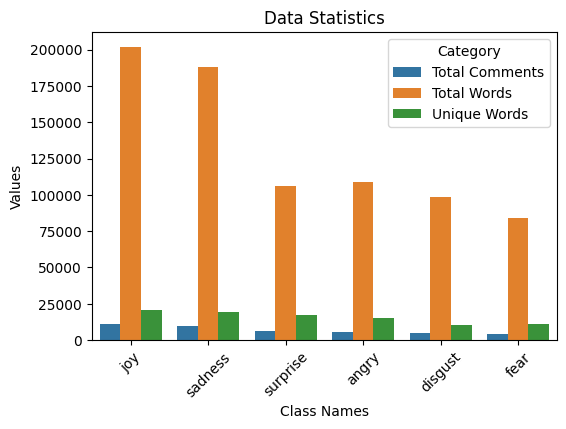

In [ ]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

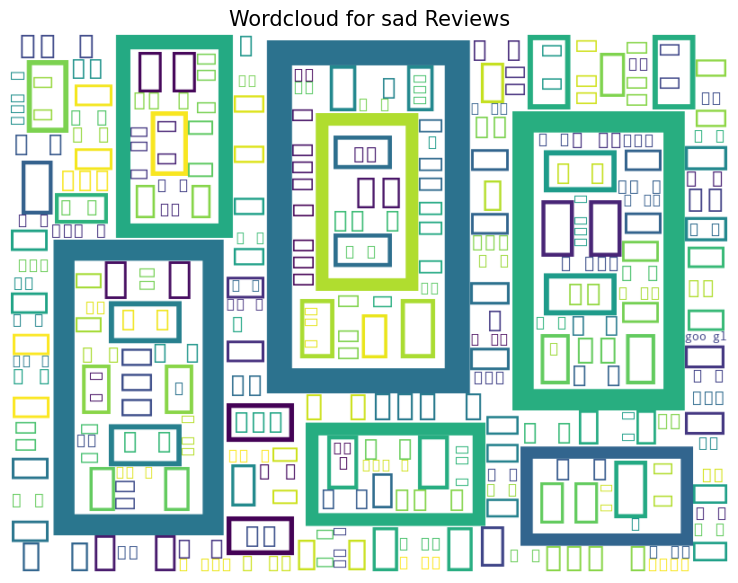

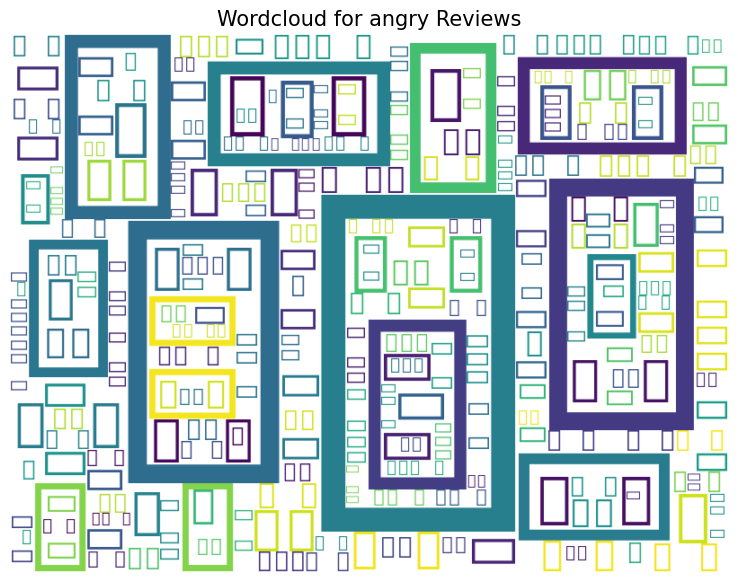

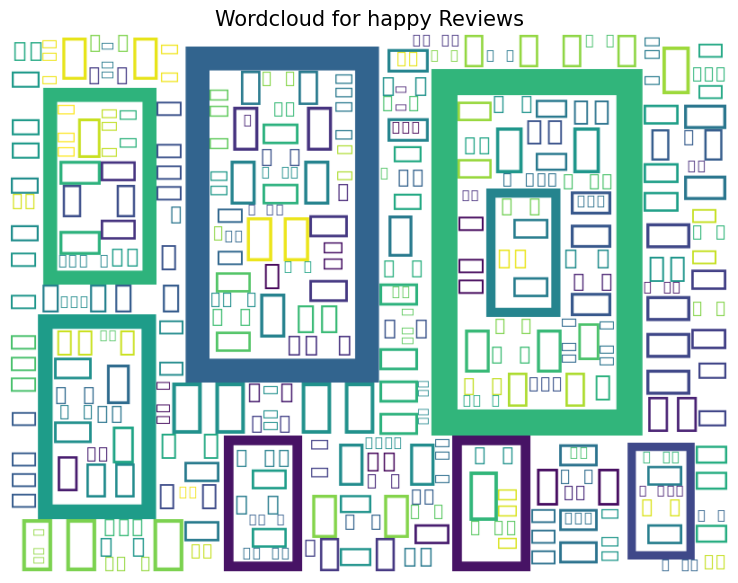

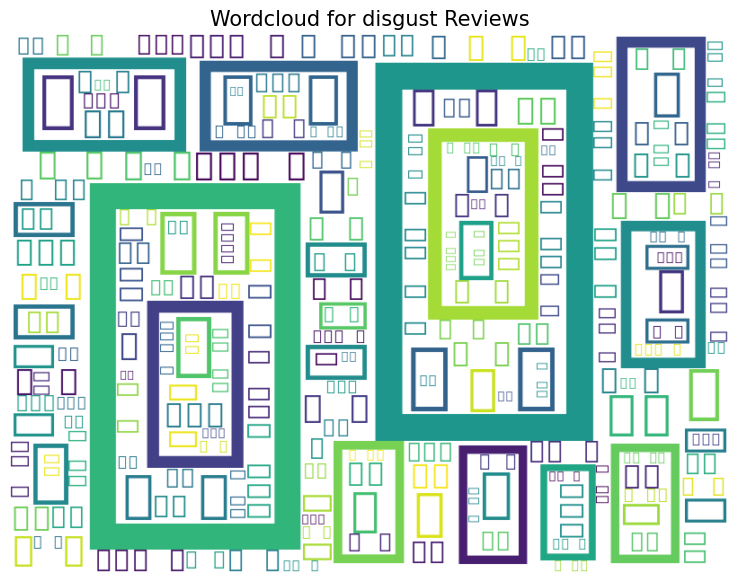

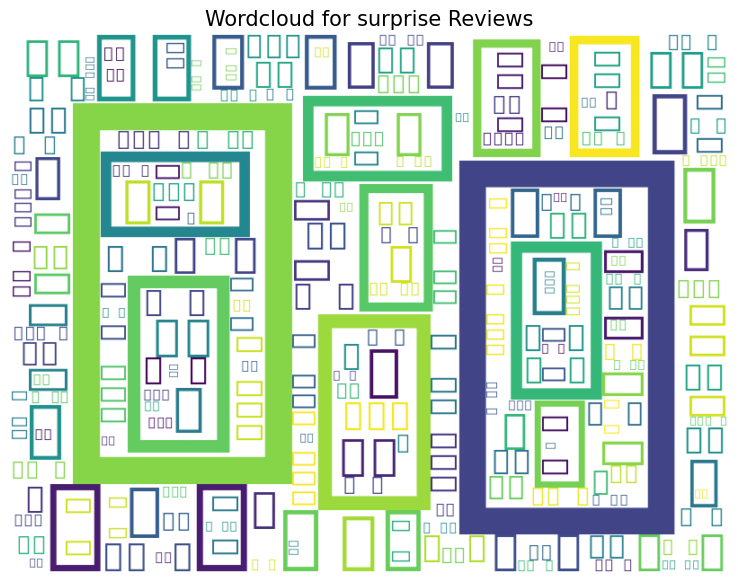

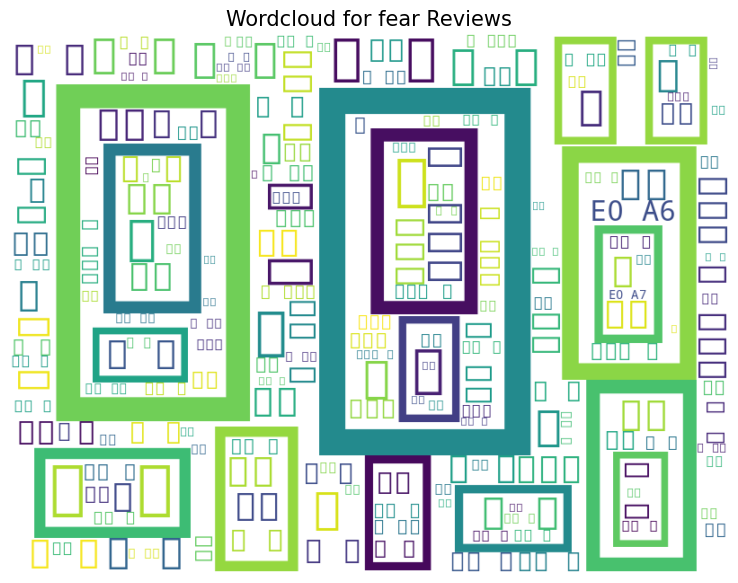

In [ ]:
from wordcloud import WordCloud

# Define a function to create a wordcloud for each emotion class
def create_wordcloud(emotion_class, data):
    # Filter reviews by emotion class
    reviews = data[data.comment_type == emotion_class]

    # Combine all reviews into a single string
    text = " ".join(reviews.comment)

    # Create the wordcloud
    wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

    # Display the wordcloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud for {emotion_class} Reviews", fontsize=15)
    plt.show()

# Create wordclouds for each emotion class
for emotion_class in data.comment_type.unique():
    create_wordcloud(emotion_class, data)

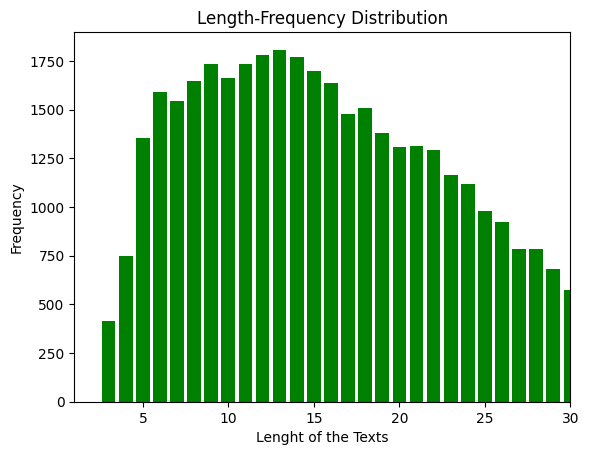

Maximum Length of a review: 479
Minimum Length of a review: 3
Average Length of a reviews: 19.0


In [ ]:
# Calculate the Length of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="g")
plt.xlim(1, 30)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [ ]:

from utils import calc_unigram_tfidf,calc_bigram_tfidf,show_tfidf


In [ ]:
tweet = 'অনেকসুন্দর ব্যাগ ☺️ ধন্যবাদ সেলারকে এতো তাড়াতাড়ি সার্ভিস দেওয়ার জন্য ♥️ ধন্যবাদ দারাজকে ♥️♥️ '
cv,feature_vector = calc_bigram_tfidf(dataset.cleaned)
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of TF-IDF Corpus =====> (28944, 283724) 

Sample Review:  অনেকসুন্দর ব্যাগ ☺️ ধন্যবাদ সেলারকে এতো তাড়াতাড়ি সার্ভিস দেওয়ার জন্য ♥️ ধন্যবাদ দারাজকে ♥️♥️ 


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [ ]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(dataset.cleaned)
# Encode the labels
lables = label_encoding(dataset.comment_type,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,Comment_Type=lables)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 50517

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 41843 
	Training		 33474 
	Test			 8369


In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y,),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='macro'),4)*100

    return my_dict


In [ ]:
from utils import ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf()

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to s

In [ ]:
print(model_names)

['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'Linear SVM', 'Kernel SVM', 'SGD']


In [ ]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,70.75,71.63,68.45,69.09
DT,60.60,61.24,61.29,61.19
RF,67.85,74.11,65.48,67.95
MNB,67.36,72.17,63.60,64.97
KNN,56.34,57.61,55.37,54.99
Linear SVM,63.52,67.90,59.57,59.52
RBF SVM,66.76,69.21,63.61,63.97
SGD,62.91,66.13,58.41,59.12


In [ ]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by LR at = 70.75
Highest F1-Score achieved by LR at = 69.08999999999999
Highest Precision Score achieved by RF at = 74.11
Highest Recall Score achieved by LR at = 68.45


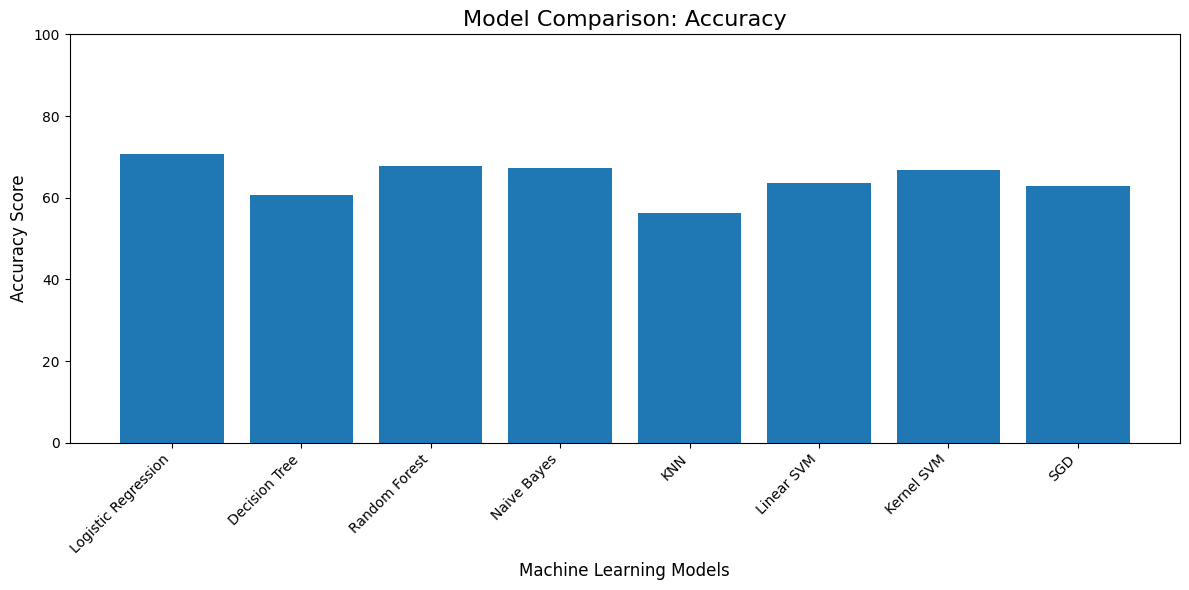

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
performance_data = json.loads("""{
"Logistic Regression": {"Accuracy": 70.75, "Precision": 71.63, "Recall": 68.45, "F1 Score": 69.09},
"Decision Tree": {"Accuracy": 60.6, "Precision": 61.24, "Recall": 61.29, "F1 Score": 61.19},
"Random Forest": {"Accuracy": 67.85, "Precision": 74.11, "Recall": 65.48, "F1 Score": 67.95},
"Naive Bayes": {"Accuracy": 67.36, "Precision": 72.17, "Recall": 63.6, "F1 Score": 64.97},
"KNN": {"Accuracy": 56.34, "Precision": 57.61, "Recall": 55.37, "F1 Score": 54.99},
"Linear SVM": {"Accuracy": 63.52, "Precision": 67.9, "Recall": 59.57, "F1 Score": 59.52},
"Kernel SVM": {"Accuracy": 66.76, "Precision": 69.21, "Recall": 63.61, "F1 Score": 63.97},
"SGD": {"Accuracy": 62.91, "Precision": 66.13, "Recall": 58.41, "F1 Score": 59.12}
}""")

# Extract model names and accuracy scores
model_names = list(performance_data.keys())
accuracy_scores = [performance_data[model]["Accuracy"] for model in model_names]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Comparison: Accuracy", fontsize=16)
plt.ylim(0, 100)  # Set y-axis range from 0 to 100

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()

In [ ]:
def plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,gram_name):

    """
    This function will plot the ROC curve for all classifiers

    Args:
        gram_models: a function of all the models defination for a gram feature
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
        gram_name: gram feature name(str)


    """

    ml_models,model_names = gram_models

    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

    y_true = y_test
    y_score = []

    # Train the models and record the results
    for i,model in enumerate(ml_models):
        model = model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test, y_pred)

        auc = roc_auc_score(y_test, y_pred, multi_class='ovr')

        result_table = result_table.append({'classifiers':model_names[i],
                                            'fpr':fpr,
                                            'tpr':tpr,
                                            'auc':auc}, ignore_index=True)
        y_score.append(y_pred)

    return y_true, y_score

    # Set name of the classifiers as index labels
    # result_table.set_index('classifiers', inplace=True)

    # # plotting
    # fig = plt.figure(figsize=(8,6))

    # for i in result_table.index:
    #     plt.plot(result_table.loc[i]['fpr'],
    #              result_table.loc[i]['tpr'],
    #              label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    # plt.plot([0,1], [0,1], color='orange', linestyle='--')

    # plt.xticks(np.arange(0.0, 1.1, step=0.1))
    # plt.xlabel("False Positive Rate", fontsize=12)

    # plt.yticks(np.arange(0.0, 1.1, step=0.1))
    # plt.ylabel("True Positive Rate", fontsize=12)

    # plt.title(f'ROC Curve Analysis for {gram_name} features', fontweight='bold', fontsize=12)
    # plt.legend(prop={'size':13}, loc='lower right')

    # plt.show()


In [ ]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(dataset.cleaned)
# Encode the labels
lables = label_encoding(dataset.comment_type,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,Comment_Type=lables)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 357587

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 41843 
	Training		 33474 
	Test			 8369


In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y,),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, pos_label='positive',
                                           average='macro'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='macro'),4)*100

    return my_dict

In [ ]:
from utils import ml_models_for_bigram_tfidf
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf()

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to s

In [ ]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,71.59,74.25,68.79,70.11
DT,60.71,61.76,61.52,61.56
RF,66.96,75.03,64.40,67.38
MNB,69.36,68.38,69.16,68.43
KNN,54.43,59.01,55.37,53.09
Linear SVM,65.30,71.29,60.79,61.37
RBF SVM,65.22,71.26,60.69,61.25
SGD,60.69,69.03,55.12,55.49


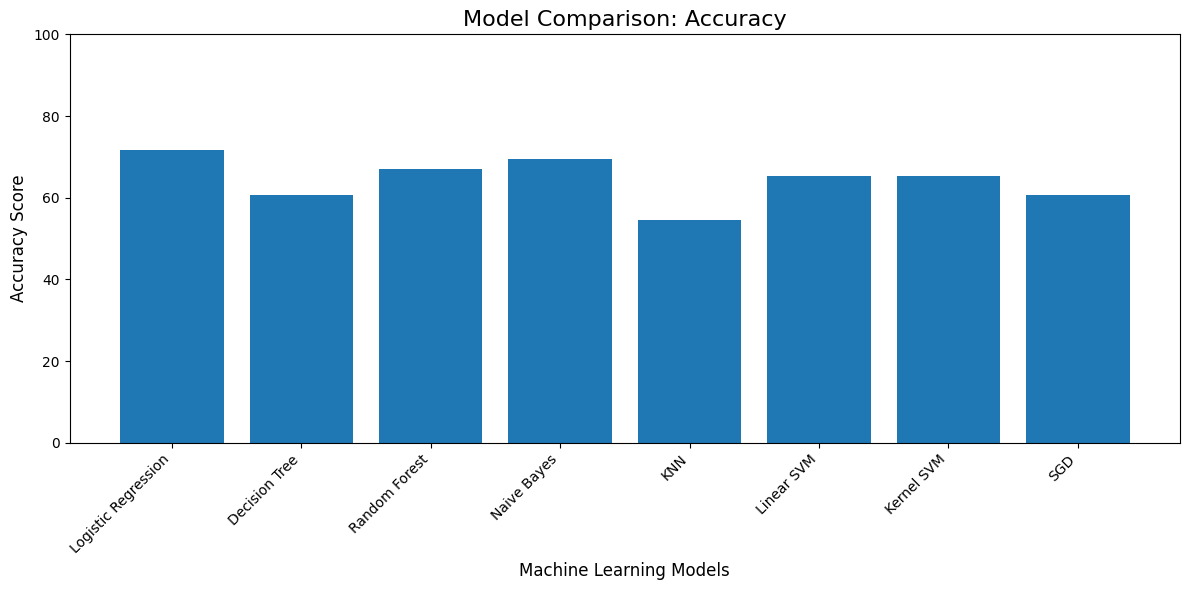

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
performance_data = json.loads("""{
"Logistic Regression": {"Accuracy": 71.59, "Precision": 74.25, "Recall": 68.79, "F1 Score": 70.11},
"Decision Tree": {"Accuracy": 60.71, "Precision": 61.76, "Recall": 61.52, "F1 Score": 61.56},
"Random Forest": {"Accuracy": 66.96, "Precision": 75.03, "Recall": 64.4, "F1 Score": 67.38},
"Naive Bayes": {"Accuracy": 69.36, "Precision": 68.38, "Recall": 69.16, "F1 Score": 68.43},
"KNN": {"Accuracy": 54.43, "Precision": 59.01, "Recall": 55.37, "F1 Score": 53.09},
"Linear SVM": {"Accuracy": 65.3, "Precision": 71.29, "Recall": 60.79, "F1 Score": 61.37},
"Kernel SVM": {"Accuracy": 65.22, "Precision": 71.26, "Recall": 60.69, "F1 Score": 61.25},
"SGD": {"Accuracy": 60.69, "Precision": 69.03, "Recall": 55.12, "F1 Score": 55.49}
}""")

# Extract model names and accuracy scores
model_names = list(performance_data.keys())
accuracy_scores = [performance_data[model]["Accuracy"] for model in model_names]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Comparison: Accuracy", fontsize=16)
plt.ylim(0, 100)  # Set y-axis range from 0 to 100

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()